In [187]:
%run -i probability_funct.py

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.ticker as mtick
from datetime import datetime
from IPython.display import display, HTML
from matplotlib import rc
import os
from pandas import ExcelFile
from pandas import ExcelWriter
import matplotlib.dates as mdates
import csv
from itertools import islice
from PIL import Image
from functools import reduce
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy.polynomial.polynomial as poly
from dateutil import relativedelta
import pandas as pd
import numpy as np
import math
from wdmtoolbox import wdmtoolbox
import matplotlib.pyplot as plt
%matplotlib inline
# center all the figures and tables throughout the report
display(HTML("""<style>.output {
    display: flex;
    align-items: center;
    text-align: center;}</style> """))
print(' All libraries, tools, and functions have been succesfully uploaded  ')


 All libraries, tools, and functions have been succesfully uploaded  


In [2]:
def read_file(file_path):
    base_directory = os.getcwd()
    # give the file path from the base directory
    data = base_directory + str(file_path)
    return pd.read_excel(data, engine='openpyxl')
    

def make_date_index(df, change_to_column): 
    df = df.set_index(change_to_column)
    df.index = df.index.set_names('DATE')
    return df


## Comal

In [3]:
Comal = r'/Comal/Catboost_untuned'

# Comal
Historical_path = Comal+r'/df_AI.xlsx'
df_history = read_file(Historical_path)
# Load the RCP45 dataframe
rcp_45 = Comal+r'/RCP45'
df_RCP45 = read_file(rcp_45+r'/df_future.xlsx')
# Load the RCP85 dataframe
rcp_85 = Comal+r'/RCP85'
df_RCP85 = read_file(rcp_85+r'/df_future.xlsx')
# Image of Training,Testing adn model importance
train_plot = Image.open(
    os.getcwd()+Comal+r'/Train_Plot_score.jpg')
test_plot = Image.open(
    os.getcwd()+Comal+r'/Test_Plot_score.jpg')
important_feature = Image.open(
    os.getcwd()+Comal+r'/Features_importance/Feature Importances - Hist.jpg')


In [4]:
# Create dataframe with datetime as index
df_history = make_date_index(df_history, 'DATE')
df_RCP45 = make_date_index(df_RCP45, 'Unnamed: 0')
df_RCP85 = make_date_index(df_RCP85, 'Unnamed: 0')


### Training set, Testing set and feature importance

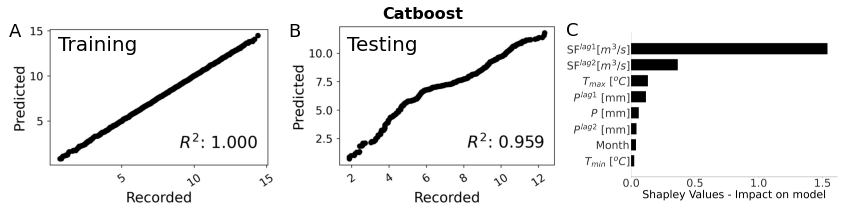

In [5]:
fig = plt.figure(figsize=(20, 20))
fig.set_size_inches(11.69,3.27)

ax1 = plt.subplot2grid((1, 3), (0, 0),)
ax1.imshow(train_plot)
ax1.text(270, 155, 'Training', fontsize=20, fontweight='medium')
ax1.text(10, 80, 'A', fontsize=18, fontweight='medium', )
ax1.set_axis_off()

ax2 = plt.subplot2grid((1, 3), (0, 1),)
ax2.text(325, 155, 'Testing', fontsize=20)
ax2.text(10, 80, 'B', fontsize=18, fontweight='medium', )


## title of plot
ax2.set_title('Catboost', loc='center', fontsize=16,
              fontweight='bold', pad=0.75)
ax2.imshow(test_plot)
ax2.set_axis_off()

ax3 = plt.subplot2grid((1, 3), (0, 2), )
ax3.imshow(important_feature)
ax3.text(10, 80, 'C', fontsize=18, fontweight='medium', )
ax3.set_axis_off()
plt.tight_layout(pad=0.5)

#plt.savefig(os.getcwd()+Comal+"/Results1.jpg", dpi = 300)


### Feature Importance plots and inflection points

In [6]:
# load and show an image with Pillow
from PIL import Image
import matplotlib.pyplot as plt
# load the image
image_1 = Image.open(os.getcwd()+Comal +
                     '/Features_importance/SF_Lag1 Hist.jpg')
image_3 = Image.open(os.getcwd()+Comal +
                     '/Features_importance/Tmax - Hist.jpg')
image_4 = Image.open(os.getcwd()+Comal +
                     '/Features_importance/Prlag1 -.jpg')
image_2 = Image.open(os.getcwd()+Comal+'/Features_importance/SF_Lag1 Hist.jpg')


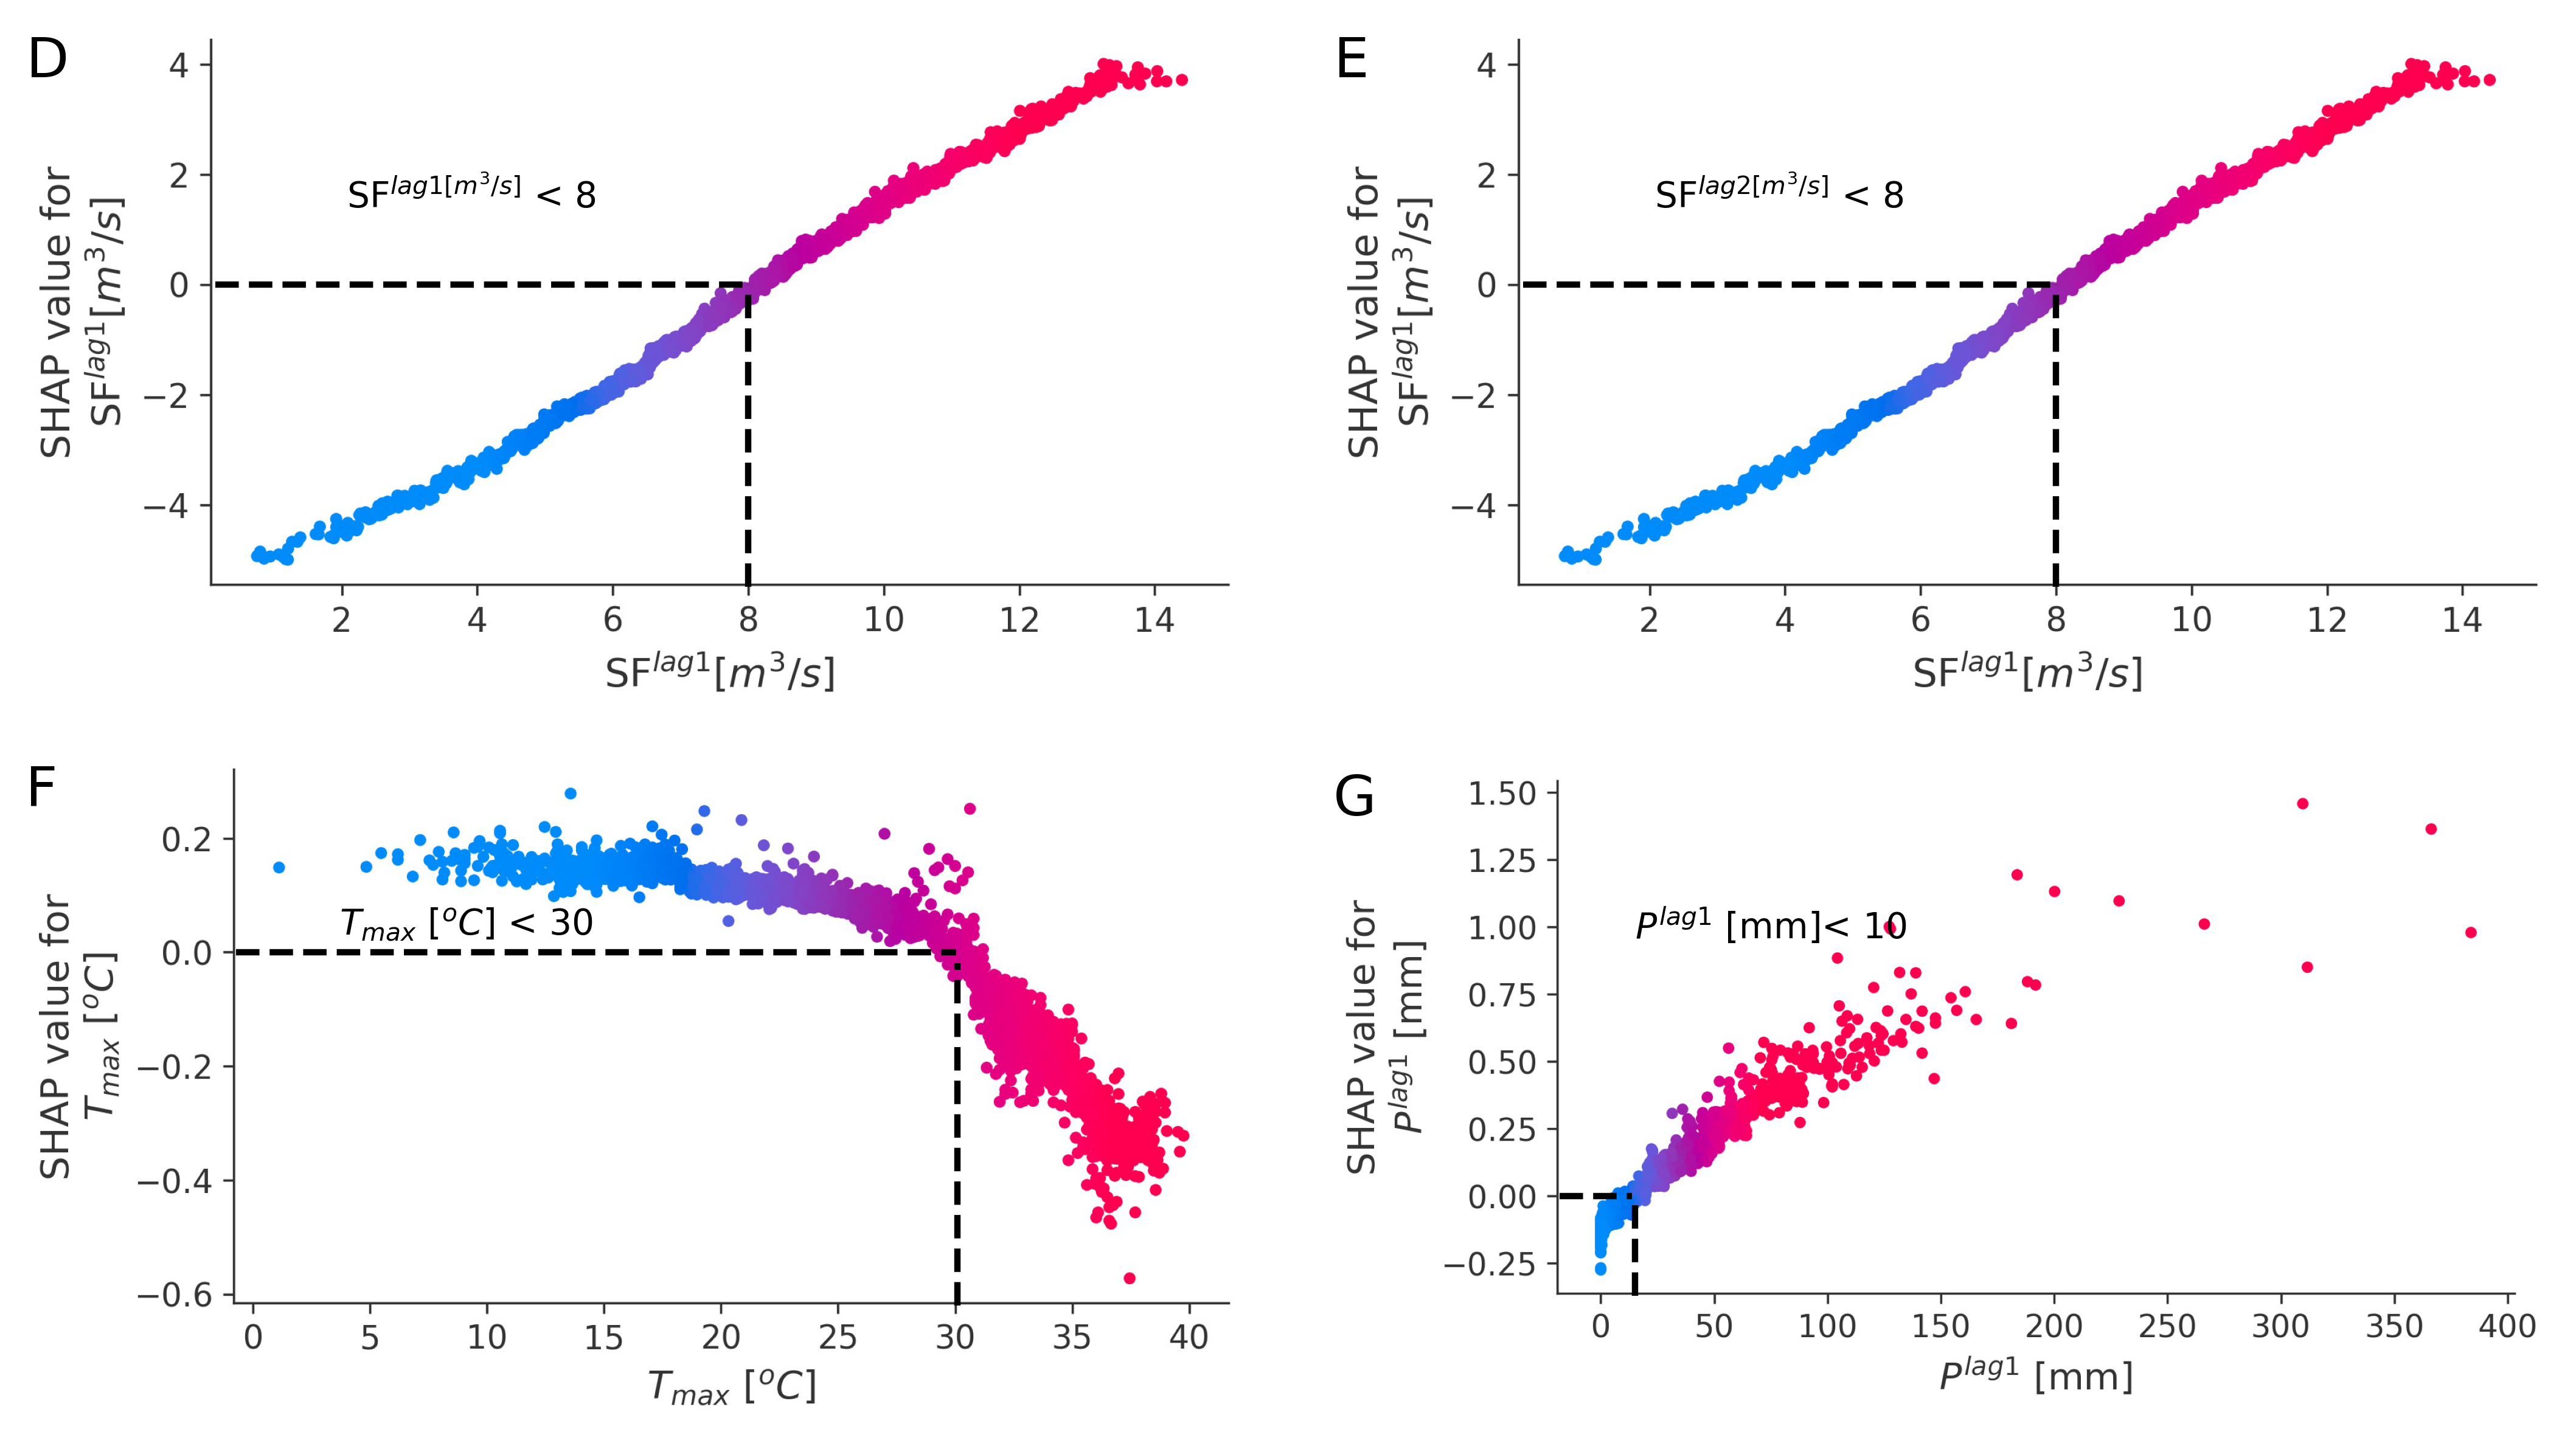

In [7]:
fig = plt.figure(figsize=(14, 8), dpi = 300, )

#fig.set_size_inches(11.69,5.9)
ax4 = plt.subplot2grid((2, 2), (0, 0),)
ax4.imshow(image_1)
ax4.text(10, 80, 'D', fontsize=22, fontweight='medium', )
ax4.hlines(y=365, xmin=270, xmax=1000,
           linestyles="--", color='black', lw=2.5)           
ax4.vlines(x=1000, ymin=780, ymax=365,
           linestyles="--", color='black', lw=2.5)
plt.tight_layout(pad=0.35)
ax4.text(450, 260,'SF$^{lag1[m^3/s]}$ < 8',fontsize=14)
ax4.set_axis_off()

#plt.title('Feature Importance', loc='center', fontsize=20,
          #fontweight='bold', pad=0.75)
ax5 = plt.subplot2grid((2, 2), (0, 1),)
ax5.imshow(image_2)
ax5.text(10, 80, 'E', fontsize=22, fontweight='medium', )
ax5.hlines(y=365, xmin=270, xmax=1000,
           linestyles="--", color='black', lw=2.5)
ax5.vlines(x=1000, ymin=780, ymax=365,
           linestyles="--", color='black', lw=2.5)
ax5.text(450, 260, 'SF$^{lag2[m^3/s]}$ < 8', fontsize=14)
ax5.set_axis_off()

ax6 = plt.subplot2grid((2, 2), (1, 0),)
ax6.imshow(image_3)
ax6.text(10, 80, 'F', fontsize=22, fontweight='medium', )
ax6.hlines(y=285, xmin=305, xmax=1315,
           linestyles="--", color='black', lw=2.5)
ax6.vlines(x=1316, ymin=780, ymax=300,
           linestyles="--", color='black', lw=2.5)
plt.tight_layout(pad=0.35)
ax6.text(450, 260, '$T_{max}$ [$^oC$] < 30', fontsize=14)
ax6.set_axis_off()

#plt.title('Feature Importance', loc='center', fontsize=20,
#fontweight='bold', pad=0.75)
ax7 = plt.subplot2grid((2, 2), (1, 1),)
ax7.imshow(image_4)
ax7.text(10, 80, 'G', fontsize=22, fontweight='medium', )
ax7.hlines(y=635, xmin=340, xmax=445,
           linestyles="--", color='black', lw=2.5)
ax7.vlines(x=450, ymin=780, ymax=640,
           linestyles="--", color='black', lw=2.5)
ax7.text(450, 260, '$P^{lag1}$ [mm]< 10', fontsize=14)
ax7.set_axis_off()

fig.tight_layout(pad=0.3, w_pad=3)
#plt.savefig(os.getcwd()+Comal+"/Feature_Collage.jpg", dpi = 600,)


### Probability calculations using the sprring flow critical cs_levels

In [8]:
df_history.columns

Index(['$T_{min}$ [$^oC$]', '$T_{max}$ [$^oC$]', '$P$ [mm]', 'SF$[m^3/s]$',
       'Month', '$T_{max}^{lag1}$ [$^oC$]', '$T_{max}^{lag2}$ [$^oC$]',
       '$T_{min}^{lag1}$ [$^oC$]', '$T_{min}^{lag2}$ [$^oC$]',
       '$P^{lag1}$ [mm]', '$P^{lag2}$ [mm]', 'SF$^{lag1} [m^3/s]$',
       'SF$^{lag2} [m^3/s]$'],
      dtype='object')

In [9]:
## Critical level defined below
cfs_to_m3 = 0.028316847
cs1 = 225 * cfs_to_m3      # 225 # ft
cs3 = 150 * cfs_to_m3      # 150 # ft
cs2 = 200 * cfs_to_m3      # 200 # ft
cs4 = 100 * cfs_to_m3      # 100 # ft
cs5 = 45 * cfs_to_m3      # 45  # ft

cs = dict(zip(['CS1', 'CS2', 'CS3', 'CS4', 'CS5'],
                     np.round([cs1, cs2, cs3, cs4, cs5], 2)))
#list(df_history.columns)

In [10]:
def probability(df_history, cs_levels):
    """ Requires data-frame, feature (input), critical stage levels,
    less than or greater than sign, and the point(value) used to calculate the conditional probabilty with respect to the springflow.
    
                        #P(A|B) = P(B|A).P(A)/P(B)


    based on the model, change the inflectiion points
    """
    condition1 = (df_history['SF$^{lag1} [m^3/s]$'] < 8)
    condition2 = (df_history['SF$^{lag2} [m^3/s]$'] < 9)
    condition3 = (df_history['$T_{max}$ [$^oC$]'] < 30)
    condition4 = (df_history['$P^{lag1}$ [mm]'] < 10)

    for i in cs:

        true_pred = df_history.loc[(condition1 & condition2 & condition3 & condition4) & (
            df_history['SF$[m^3/s]$'] <= (cs[i]))]['SF$[m^3/s]$'].count()
        total_cases = df_history.loc[(
            condition1 & condition2 & condition3 & condition4)]['SF$[m^3/s]$'].count()
        print("Probability of " + str(i) +
              ": {}".format(np.round((100 * true_pred/total_cases), 1)))


### Historical probaility considering the inflection points

In [11]:
probability(df_history,cs)

Probability of CS1: 48.8
Probability of CS2: 25.0
Probability of CS3: 4.6
Probability of CS4: 1.2
Probability of CS5: 0.2


#### RCP45 probability considering inflection points

In [12]:

probability(df_RCP45,cs)


Probability of CS1: 69.7
Probability of CS2: 51.6
Probability of CS3: 20.3
Probability of CS4: 2.2
Probability of CS5: 0.0


#### RCP85 probability considering inflecction points

In [13]:

probability(df_RCP85,cs)

Probability of CS1: 64.6
Probability of CS2: 52.4
Probability of CS3: 21.5
Probability of CS4: 1.1
Probability of CS5: 0.0


In [15]:
Approved_date = str(df_history.last_valid_index()).strip(" 00:00:00")

Approved_date

'2020-11-29'

### Projetion plots 

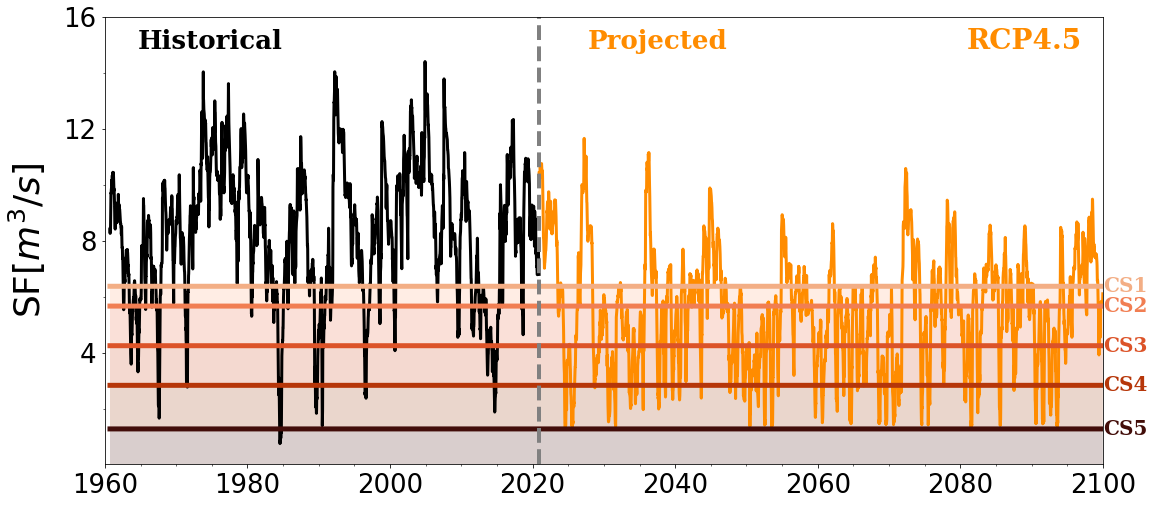

In [16]:
fig_45 = plot_projections(df_history, df_RCP45, 4.5,rcp_45, Approved_date)


## San Marcos

### Load all data fro processing

In [16]:
San_marco = r'/San_marco/catboost_untuned'

# San marcos
Historical_path = San_marco+r'/df_AI_Spring.xlsx'
df_history_ = read_file(Historical_path)
# Load the RCP45 dataframe
rcp_45_ = San_marco+r'/RCP45'
df_RCP45_ = read_file(rcp_45_+r'/df_future.xlsx')
# Load the RCP85 dataframe
rcp_85_= San_marco+r'/RCP85'
df_RCP85_ = read_file(rcp_85_+r'/df_future.xlsx')

# Image of Training,Testing adn model importance
train_plot_ = Image.open(os.getcwd()+San_marco+r'/Train_Plot_score.jpg')
test_plot_ = Image.open(os.getcwd()+San_marco+r'/Test_Plot_score.jpg')
important_feature_ = Image.open(os.getcwd()+San_marco+r'/Features_importance/Feature Importances-Hist.jpg')

In [17]:
# Create dataframe with datetime as index
df_history_ = make_date_index(df_history_, 'DATE')
df_RCP45_ = make_date_index(df_RCP45_, 'Unnamed: 0')
df_RCP85_ = make_date_index(df_RCP85_, 'Unnamed: 0')

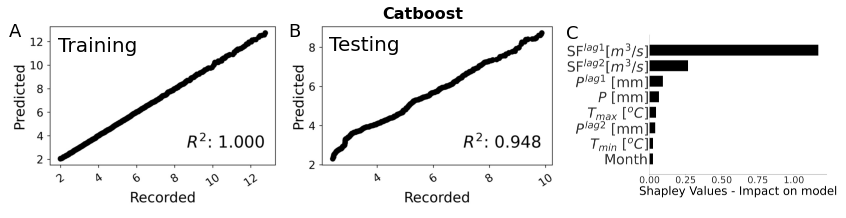

In [18]:
fig = plt.figure(figsize=(20, 20))
fig.set_size_inches(11.69,3.27)

ax1 = plt.subplot2grid((1, 3), (0, 0),)
ax1.imshow(train_plot_)
ax1.text(270, 155, 'Training', fontsize=20, fontweight='medium')
ax1.text(10, 80, 'A', fontsize=18, fontweight='medium', )
ax1.set_axis_off()

ax2 = plt.subplot2grid((1, 3), (0, 1),)
ax2.text(230, 155, 'Testing', fontsize=20)
ax2.text(10, 80, 'B', fontsize=18, fontweight='medium', )

## title of plot
ax2.set_title('Catboost', loc='center', fontsize=16,
              fontweight='bold', pad=0.75)
              
ax2.imshow(test_plot_)
ax2.set_axis_off()

ax3 = plt.subplot2grid((1, 3), (0, 2), )
ax3.imshow(important_feature_)
ax3.text(10, 80, 'C', fontsize=18, fontweight='medium', )
ax3.set_axis_off()
plt.tight_layout(pad=0.5)
plt.savefig(os.getcwd()+San_marco+"/Results1.jpg", dpi = 300)


### Feature Importance plots and inflection points

In [19]:
# load the image
image_1 = Image.open(os.getcwd()+San_marco +
                     '/Features_importance/Feature Interaction_6.jpg')
image_2 = Image.open(os.getcwd()+San_marco +
                     '/Features_importance/Feature Interaction_7.jpg')
image_3 = Image.open(os.getcwd()+San_marco +
                     '/Features_importance/Feature Interaction_4.jpg')
image_4 = Image.open(os.getcwd()+San_marco+'/Features_importance/Feature Interaction_3.jpg')


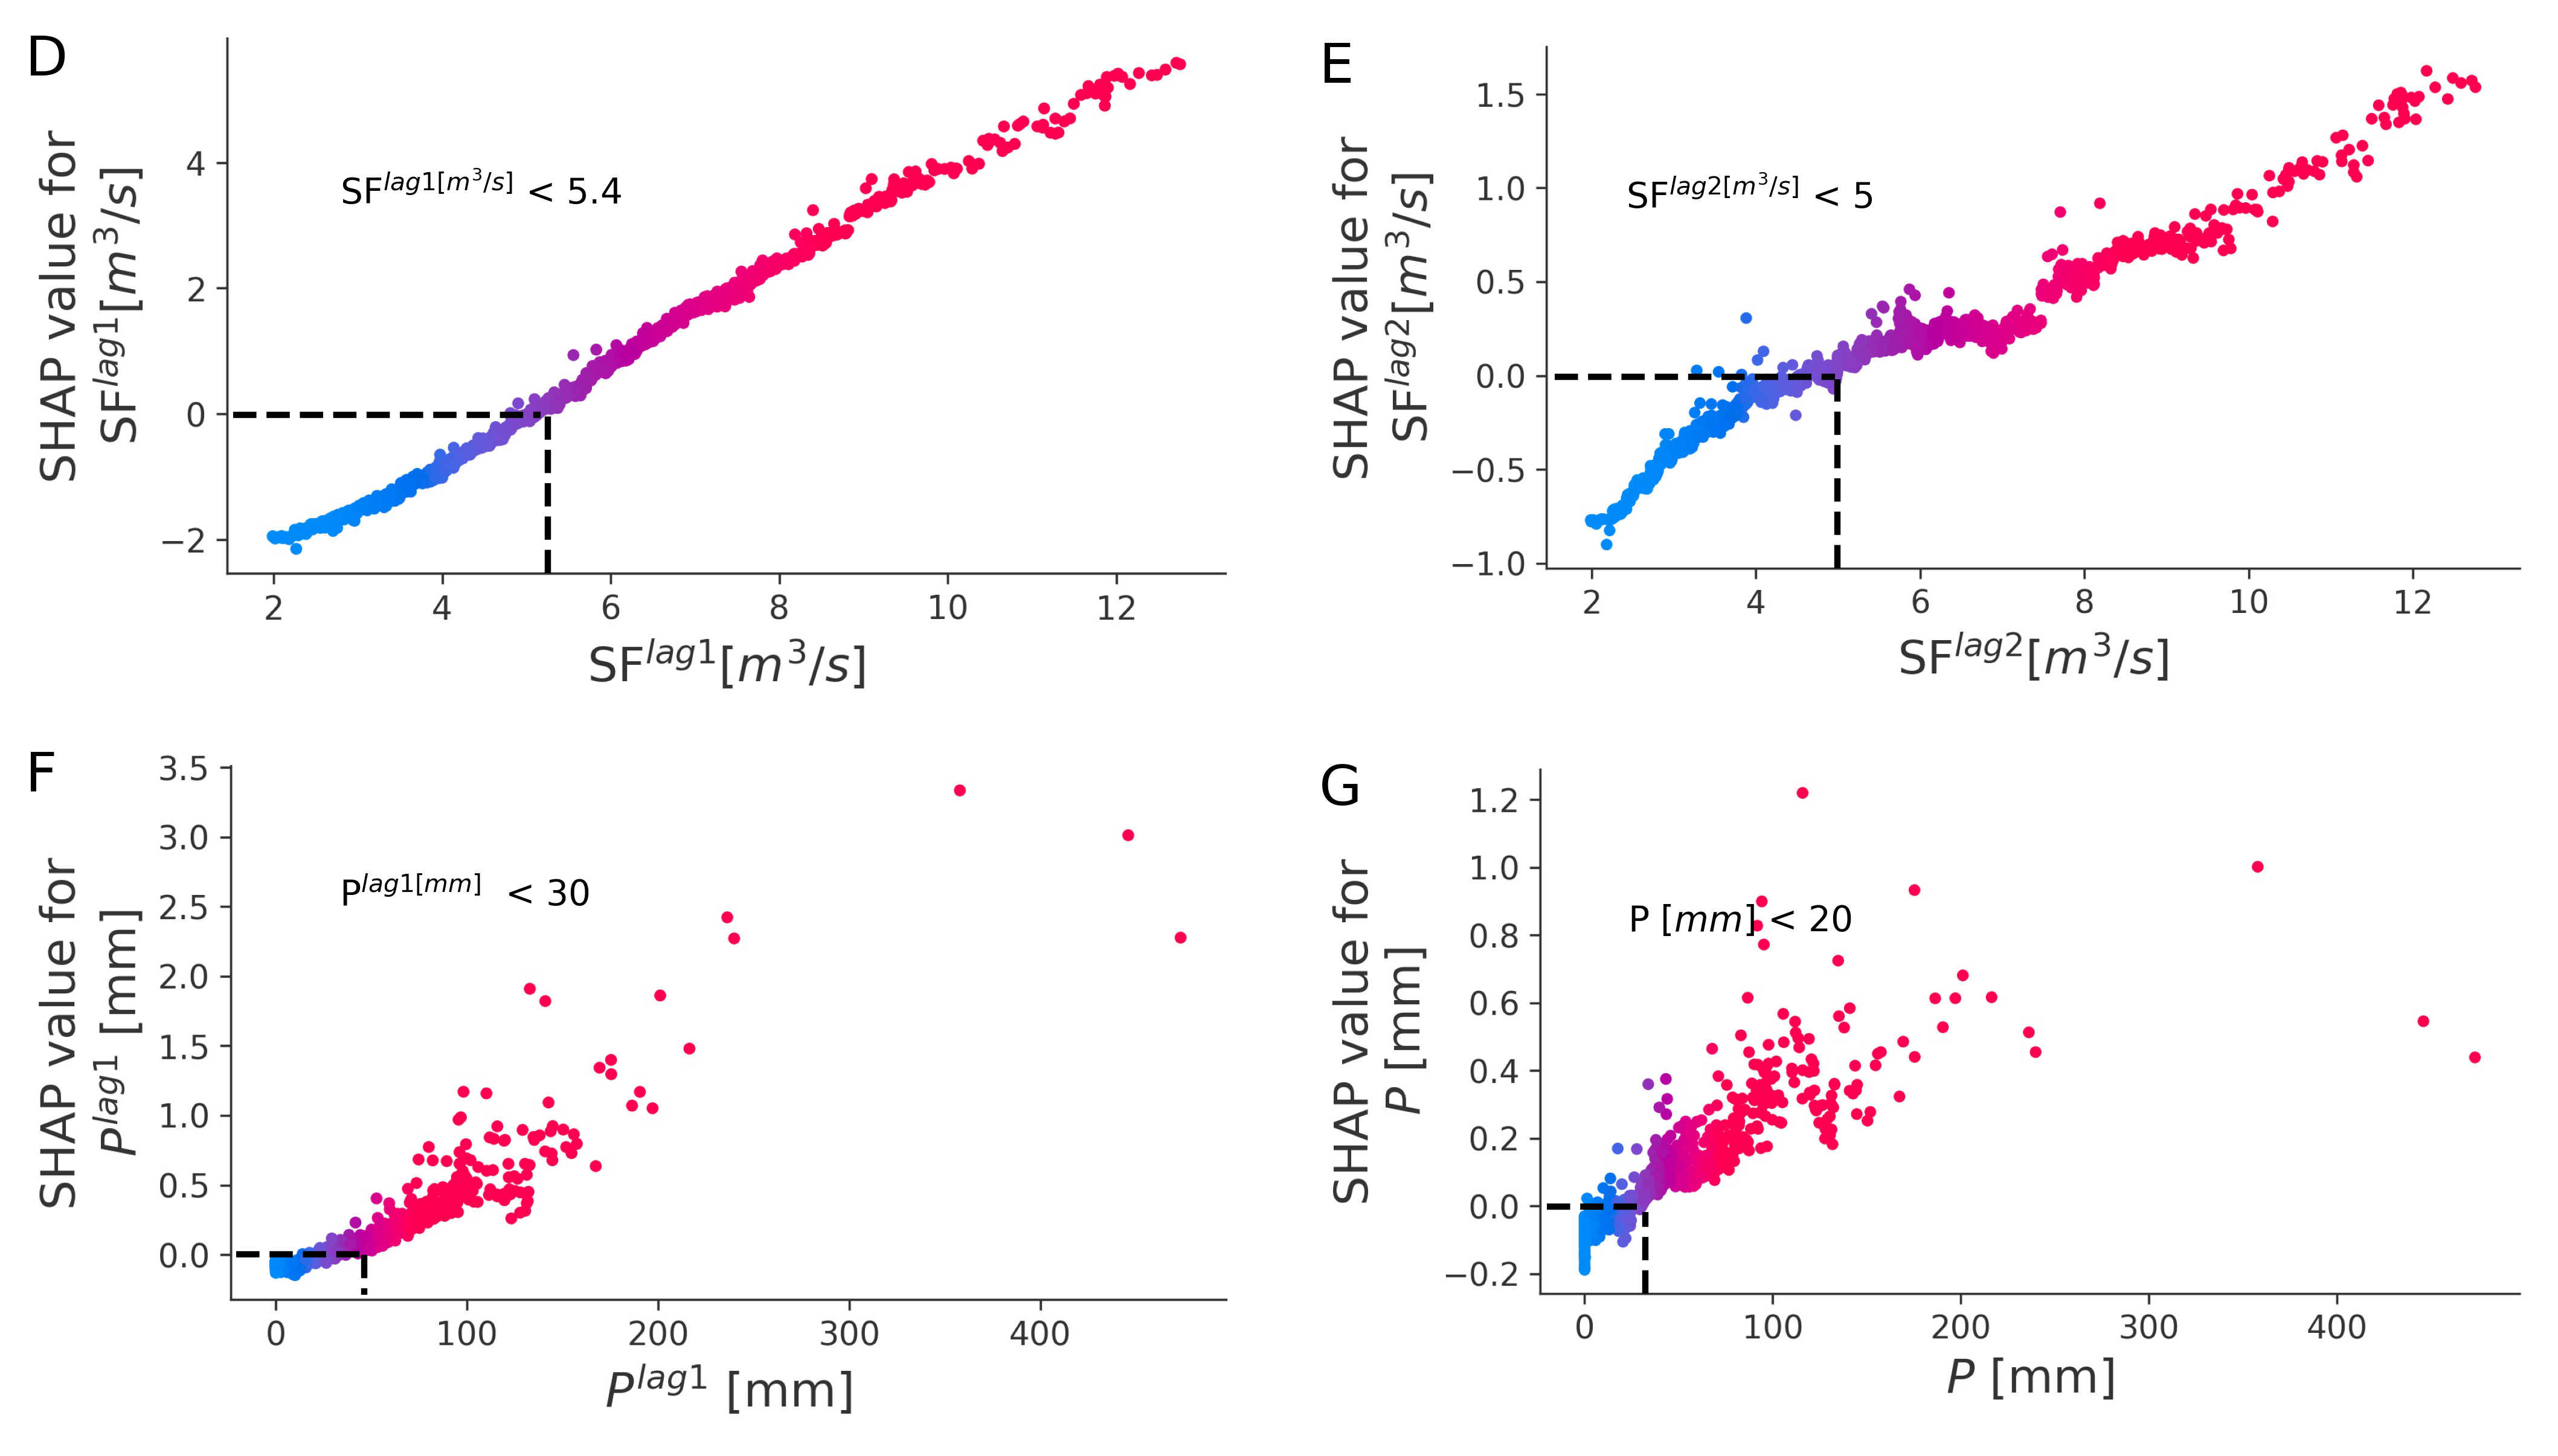

In [20]:
fig = plt.figure(figsize=(14, 8), dpi = 300, )

#fig.set_size_inches(11.69,5.9)
ax4 = plt.subplot2grid((2, 2), (0, 0),)
ax4.imshow(image_1)
ax4.text(10, 80, 'D', fontsize=22, fontweight='medium', )

ax4.hlines(y=555, xmin=300, xmax=730,
           linestyles="--", color='black', lw=2.5)       
ax4.vlines(x=740, ymin=776, ymax=555,
           linestyles="--", color='black', lw=2.5)

ax4.text(450, 260,'SF$^{lag1[m^3/s]}$ < 5.4',fontsize=14)
ax4.set_axis_off()

#plt.title('Feature Importance', loc='center', fontsize=20,
          #fontweight='bold', pad=0.75)
ax5 = plt.subplot2grid((2, 2), (0, 1),)
ax5.imshow(image_2)
ax5.text(10, 80, 'E', fontsize=22, fontweight='medium', )
ax5.hlines(y=502, xmin=348, xmax=750,
           linestyles="--", color='black', lw=2.5)
ax5.vlines(x=753, ymin=776, ymax=505,
           linestyles="--", color='black', lw=2.5)
ax5.text(450, 260, 'SF$^{lag2[m^3/s]}$ < 5', fontsize=14)
ax5.set_axis_off()

ax6 = plt.subplot2grid((2, 2), (1, 0),)
ax6.imshow(image_3)
ax6.text(10, 80, 'F', fontsize=22, fontweight='medium', )
ax6.hlines(y=729, xmin=305, xmax=485,
           linestyles="--", color='black', lw=2.5)
ax6.vlines(x=485, ymin=730, ymax=786,
           linestyles="--", color='black', lw=2.5)
plt.tight_layout(pad=0.35)
ax6.text(
    450, 240, 'P$^ {lag1[mm]}$  < 30' , fontsize=14)
ax6.set_axis_off()

#plt.title('Feature Importance', loc='center', fontsize=20,
#fontweight='bold', pad=0.75)
ax7 = plt.subplot2grid((2, 2), (1, 1),)
ax7.imshow(image_4)
ax7.text(10, 80, 'G', fontsize=22, fontweight='medium', )
ax7.hlines(y=652, xmin=334, xmax=475,
           linestyles="--", color='black', lw=2.5)
ax7.vlines(x=475, ymin=776, ymax=660,
           linestyles="--", color='black', lw=2.5)
ax7.text(450, 260, 'P $[mm]$ < 20', fontsize=14)
ax7.set_axis_off()

fig.tight_layout(pad=0.3, w_pad=3)

#plt.savefig(os.getcwd()+San_marco+"/Feature_Inflections.jpg", dpi = 300,)


### Inflection point probabilities 

In [28]:
cs1_ = 96 * cfs_to_m3      
cs2_ = 80 * cfs_to_m3      

cs_ = dict(zip(['CS1', 'CS2',],np.round([cs1_, cs2_,], 2)))
#list(df_history.columns)


In [41]:
def probability_(df_history, cs_levels):
    """ Requires data-frame, feature (input), critical stage levels,
    less than or greater than sign, and the point(value) used to calculate the conditional probabilty with respect to the springflow.
    
                        #P(A|B) = P(B|A).P(A)/P(B)
    """
    condition1 = (df_history['SF$^{lag1} [m^3/s]$'] <5.4)
    condition2 = (df_history['SF$^{lag2} [m^3/s]$'] < 5)
    condition3 = (df_history['$P^{lag1}$ [mm]'] < 30)
    condition4 = (df_history['$P$ [mm]'] < 20)



    for i in cs:

        true_pred = df_history.loc[(condition1 & condition2 & condition3 & condition4) & (
            df_history['SF$[m^3/s]$'] <= (cs[i]))]['SF$[m^3/s]$'].count()
        total_cases = df_history.loc[(
            condition1 & condition2 & condition3 & condition4)]['SF$[m^3/s]$'].count()
        print("Probability of " + str(i) +
            ": {}".format(np.round((100 * true_pred/total_cases), 1)))


#### Historical Inflection point probability 

In [42]:
probability_(df_history_, cs_)

Probability of CS1: 100.0
Probability of CS2: 100.0
Probability of CS3: 77.2
Probability of CS4: 16.4
Probability of CS5: 0.0


#### RCP45 inflection point probability

In [43]:
probability_(df_RCP45_,cs_)

Probability of CS1: 100.0
Probability of CS2: 100.0
Probability of CS3: 64.0
Probability of CS4: 2.8
Probability of CS5: 0.0


#### RCP85 inflection point probability 

In [44]:
probability_(df_RCP85,cs_)

Probability of CS1: 100.0
Probability of CS2: 99.9
Probability of CS3: 79.6
Probability of CS4: 39.7
Probability of CS5: 0.1


In [45]:
%run -i probability_funct.py

<Figure size 432x288 with 0 Axes>

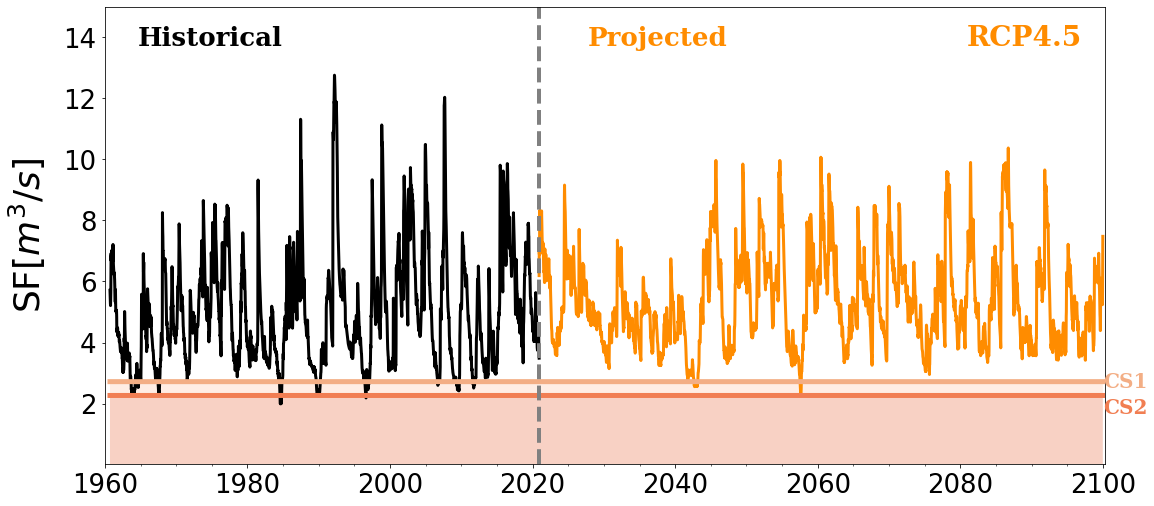

In [172]:
fig_45_ = plot_projections(df_history_, df_RCP45_, 4.5, rcp_45_, Approved_date)

(0.01, 10.0)

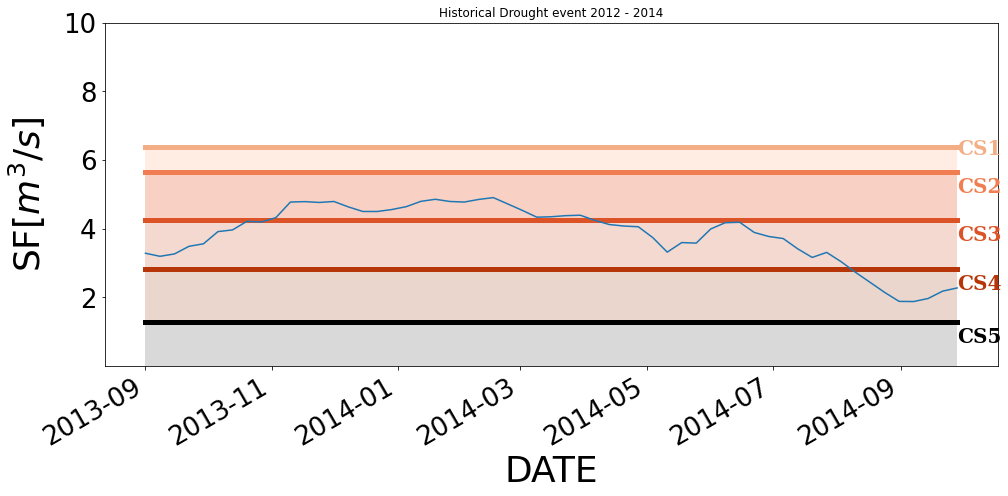

In [77]:
fig, ax1 = plt.subplots(1,1, figsize=(16,7))

drought_reference = "Historical Drought event 2012 - 2014"


temp = df_history["2013-09":'2014-09']
phase1 = np.zeros(len(temp))
phase1[phase1 == 0] = 225*0.028316847
phase2 = np.zeros(len(temp))
phase2[phase2 == 0] = 200*0.028316847
phase3 = np.zeros(len(temp))
phase3[phase3 == 0] = 150*0.028316847
phase4 = np.zeros(len(temp))
phase4[phase4 == 0] = 100*0.028316847
phase5 = np.zeros(len(temp))
phase5[phase5 == 0] = 45*0.028316847



ax1.plot(temp.index, phase1, 
		'-', color='#f3ae85',
		 lw=5, label = 'Critical Stage I')
ax1.plot(temp.index, phase2,
		'-', color='#f17e52',			
		 lw=5, label = 'Critical Stage II')
ax1.plot(temp.index, phase3, 
		'-', color='#dc5328',
		lw=5, label = 'Critical Stage III')
ax1.plot(temp.index, phase4, 
		'-', color='#b63609',
		 lw=5, label = 'Critical Stage IV')
ax1.plot(temp.index, phase5, 
		'-', color='black',
		 lw=5, label = 'Critical Stage V')

ax1.set_xlabel('', fontsize = 36)
ax1.tick_params(axis = "x", labelsize = 26, )
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('SF$[m^3/s]$', fontsize = 36,labelpad=15)
ax1.tick_params(axis = "y", labelsize = 26, )
ax1.yaxis.set_tick_params(pad=5)

tw = np.array (temp.index)
plt.fill_between(tw, phase2[0],phase1[0],
				 alpha=0.20, facecolor='#ffa579')
plt.fill_between(tw,phase2[0],phase3[0],
				 alpha=0.3, facecolor='#e9683c')
plt.fill_between(tw, phase4[0] , phase3[0], 
				 alpha=0.20, facecolor='#cc4217')
plt.fill_between(tw, phase5[0] , phase4[0], 
				 alpha=0.20, facecolor='#993404')
plt.fill_between(tw,   phase5[0],phase5[0]-3, 
				 alpha=0.15, facecolor='black')

font = {'family': 'serif', 'color':  '#f3ae85', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase1[0]-0.2, r'CS1', fontdict=font)
font = {'family': 'serif', 'color':  '#f17e52', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase2[0]-0.6, r'CS2', fontdict=font)
font = {'family': 'serif', 'color':  '#dc5328', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase3[0]-0.6, r'CS3', fontdict=font)
font = {'family': 'serif', 'color':  '#b63609', 'weight': 'bold', 'size': 20}
plt.text(tw[-1], phase4[0]-0.6, r'CS4', fontdict=font)
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'size': 20}
plt.text(tw[-1], phase5[0]-0.6, r'CS5', fontdict=font)
#font = {'family': 'serif', 'color':  colour, 'weight': 'bold', 'size': 28}

temp["SF$[m^3/s]$"].plot(title =drought_reference, ax = ax1)
plt.ylim((0.01,10))

In [2]:
df = df_history[['$T_{max}$ [$^oC$]', '$P$ [mm]', 'SF$[m^3/s]$', '$T_{min}$ [$^oC$]', 'Month']]
temp = df_history["2011":'2011']

NameError: name 'df_history' is not defined

import calendar
d = dict(enumerate(calendar.month_abbr))
temp['month'] = temp.Month.map(d)
temp

Since we are comparing to the 2013 drought. 
Shall we gatehr the events that occured in 2013?

- '$T_{max}$ [$^oC$]'
- '$P$ [mm]'
- 'SF$[m^3/s]$'
- '$T_{min}$ [$^oC$]'

make boxplot to give us the mean and extremes, we can compare these values to our projection values. Annual box plot of the same features and a conditions to obtain all years that/occurances that this occurs.


Text(0.5, 298.59999999999997, '')

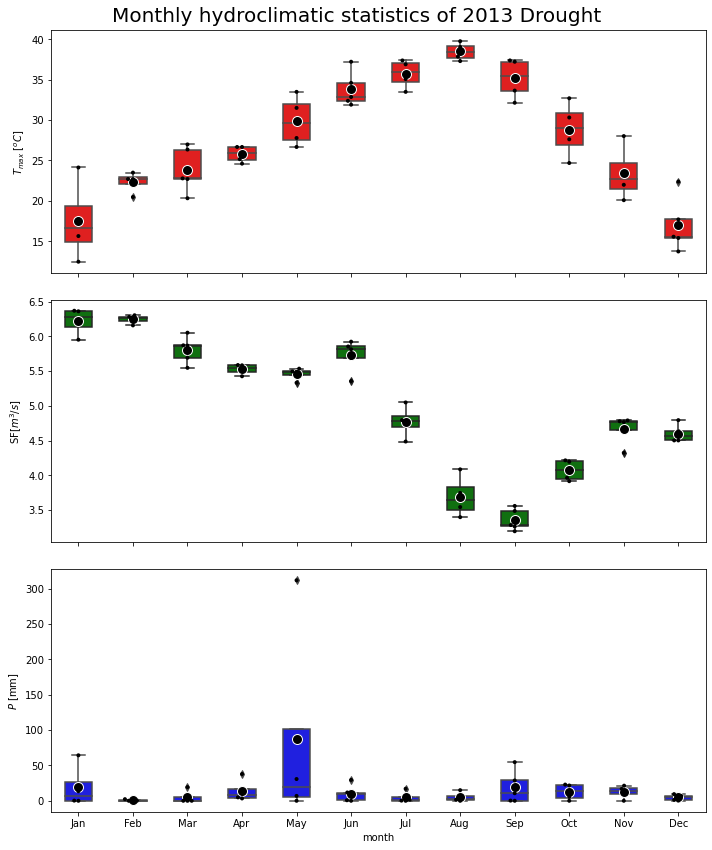

In [239]:
import seaborn as sns
import matplotlib
fig , ax = plt.subplots(3,1,figsize=(10,12),sharex = True)


hydroclimatic_features = ['$T_{max}$ [$^oC$]', 'SF$[m^3/s]$',  '$P$ [mm]']
colours_bx = ['red','green','blue']

fig.suptitle('Monthly hydroclimatic statistics of 2013 Drought', fontsize=20)

for  count, features in enumerate(hydroclimatic_features):
    
    sns.swarmplot(x='month', y=features, ax = ax[count],
                data=temp,  color='black', size = 4,)

    sns.boxplot(x='month', y= features, ax = ax[count],
            data=temp,  color=colours_bx[count], 
            width = 0.5,
            showmeans = True,meanprops={"marker":"o",
                        "markerfacecolor":"black", 
                        "markeredgecolor":"white",
                        "markersize":"10"})


<AxesSubplot:xlabel='month', ylabel='RCP 4.5'>

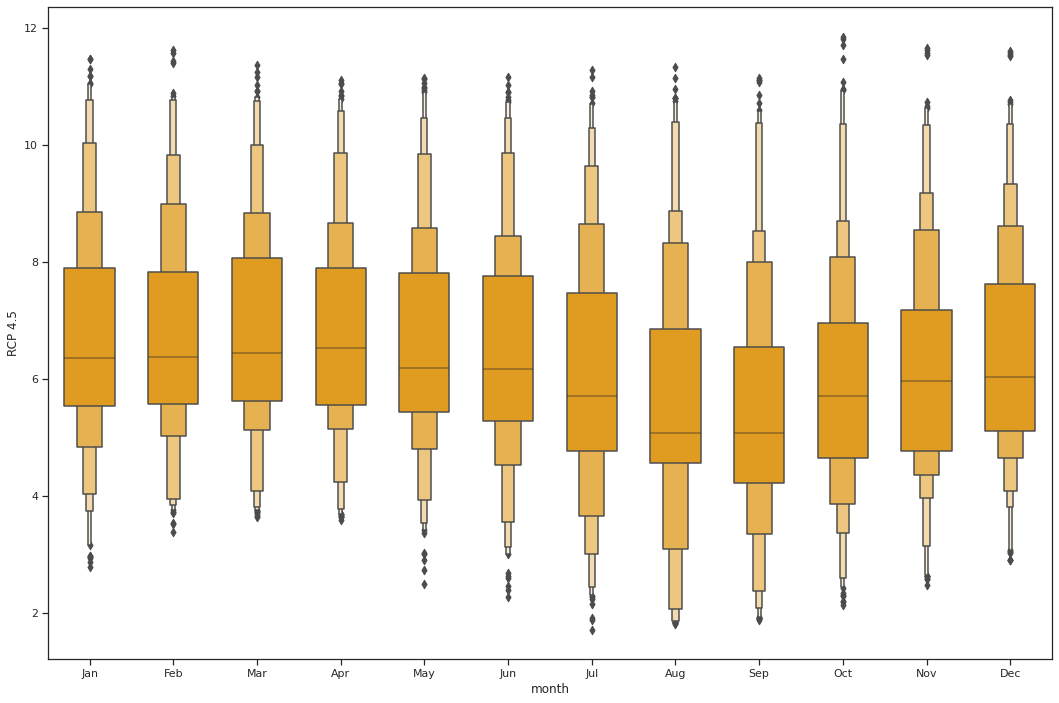

In [279]:
plt.figure(figsize = (18,12))
sns.boxenplot(x='month', y='RCP 4.5',
            data=RCp_join ,dodge = True,  color='orange', width = 0.6,)
#sns.swarmplot(x='Month', y='SF$[m^3/s]$',
 #           data=df_RCP45,  color = 'blue', size = 2,order = [9,10,11,12,1,2,3,4,5,6,7,8])


In [260]:

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

tips

RCp_join = pd.DataFrame({'RCP 4.5': df_RCP45['SF$[m^3/s]$'].to_numpy(),
                         "RCP85": df_RCP45['SF$[m^3/s]$'].to_numpy() })

RCp_join = RCp_join.set_index(df_RCP45.index)
RCp_join['month'] = RCp_join.index.strftime('%b')


In [272]:
RCp_join

,RCP 4.5,RCP85,month
DATE,,,
2009-01-04,8.278953,8.278953,Jan
2009-01-11,8.348366,8.348366,Jan
2009-01-18,8.501008,8.501008,Jan
2009-01-25,8.516185,8.516185,Jan
2009-02-01,8.497207,8.497207,Feb
...,...,...,...
2099-11-29,4.222074,4.222074,Nov
2099-12-06,4.297359,4.297359,Dec
2099-12-13,4.407323,4.407323,Dec


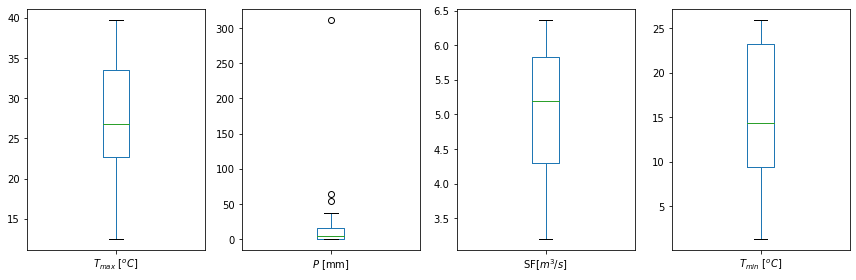

In [135]:
import numpy as np

names = temp[['$T_{max}$ [$^oC$]', '$P$ [mm]', 'SF$[m^3/s]$', '$T_{min}$ [$^oC$]']].columns
ncols = len(names)

fig, axes = plt.subplots(1,ncols, figsize = (12,4))
plt.grid(True)

for name, ax in zip(names, axes.flatten()):
    temp[[name]].plot.box(ax= ax, meanline = True ,)
    

plt.tight_layout()


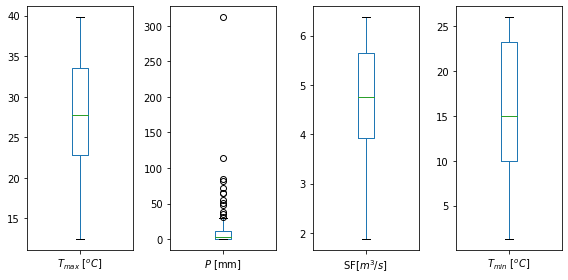

In [328]:
import numpy as np

names = df.columns
ncols = len(names)
fig, axes = plt.subplots(1,ncols, figsize = (8,4))

for name, ax in zip(names, axes.flatten()):
    df[[name]].plot.box(ax= ax, meanline = True ,)
    
plt.tight_layout()
num_skip_rows =12
#-------------------------
# RCP 4.5 - M1-Tmax; M5-Precip; M16-Tmin
#-------------------------
base_dir  = os.getcwd()+"/Downscaled_MACA_Climate_Data/M16_MIROC5_Japan"
file_name = r"RCP_4_5/data.csv"
temp = MACA_data(base_dir, file_name)

df_MACA_RCP45 = pd.DataFrame()
df_MACA_RCP45[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP45.index = pd.DatetimeIndex(df_MACA_RCP45['Date'])
df_MACA_RCP45.drop(['Date'],axis=1,inplace=True)


base_dir  = os.getcwd()+"/Downscaled_MACA_Climate_Data/M5_CCSM4_USA"
file_name = r"RCP_4_5/data.csv"
temp = MACA_data(base_dir, file_name)
df_MACA_RCP45['$P$ [mm]'] = temp['Precip[mm]'].values


base_dir  = os.getcwd()+"/Downscaled_MACA_Climate_Data/M20_NorESM1_M_Norway"
file_name = r"RCP_4_5/data.csv"
temp = MACA_data(base_dir, file_name)
df_MACA_RCP45['$T_{min}$ [$^oC$]'] = temp['Tmin[C]'].values


df_RCP45_MACA = pd.DataFrame()
df_RCP45_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP45['$T_{min}$ [$^oC$]'].resample
('W').mean()
df_RCP45_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP45['$T_{max}$ [$^oC$]'].resample
('W').mean().values
df_RCP45_MACA['$P$ [mm]'] = df_MACA_RCP45['$P$ [mm]'].resample('W').sum().values
df_RCP45_MACA.describe()
